# Regular Expressions

**Definition from Wikipedia** (see [Wikipedia](https://en.wikipedia.org/wiki/Regular_expression))

> A regular expression (shortened as **regex** or **regexp**; sometimes referred to as rational expression) is a sequence of characters that specifies a **search pattern in text**.

> Usually such patterns are used by **string-searching algorithms** for "find" or "find and replace" operations on strings, or for input validation.

**Online Resources**

- [Interactive regular expression builder, regex101.com](https://regex101.com/)
- [A Tutorial on RegEx](https://regexone.com/)

## Basics

Before using regular expressions for matching text, we need a **regular expression engine** that compiles **search patterns** into [Finite-State-Automata](https://en.wikipedia.org/wiki/Finite-state_machine).

> In Python, <code>re</code> (see [ref](https://docs.python.org/3/library/re.html)) is a module that provides regular expression matching operations similar to those found in *Perl*.

> Different syntaxes for writing regular expressions exist, one is the **POSIX standard** and another, widely used, is the **Perl syntax**.


In [ ]:
import re

help(re)

**Search/Match Patterns**

> In particular to computer science, a regular expression refers to a specific, standard textual syntax for representing **match-patterns** for matching particular sub-sequences in texts.

> **Each character** in a *match-pattern* (that is, each character in the string describing its pattern) is either a **metacharacter**, having a special meaning, or a **regular character** that has a literal meaning.

Match Pattern Character

* **Regular Characters**: any letter, digit, punctuation or symbol that is not a *metacharacter*. Regular characters matches theirselfs in texts.
* **Meta Characters**: some regular characters but with special meaning, i.e. regular characters associated with predefined functions as directives that either lead matching operations or define operands of operations. Metacharacters do not match theirselfs in texts.
  * Metacharacters:  <code> . ^ $ * + ? { } [ ] \ | ( ) </code>

**Creating a Search Pattern**

A search pattern is a string composed of a combination of regular characters and metacharacters, where reqular characters will match as is in a text, while metacharacters modify and/or determine the conditions of success in matches.

The example below, <code> pattern </code> is a search pattern with no metacharacters. It is a pattern for searching the sequence of letters, "N", "L" and "P" in the given order within a text. The <code> r </code> flag preceeding the pattern <code> r'NLP' </code> is a python directive indicating the string is of type **raw**: [see Python re module](https://docs.python.org/3/library/re.html.).

In [2]:
import re

pattern = r"NLP";

p = re.compile(pattern);

p

re.compile(r'NLP', re.UNICODE)

In [3]:
test_str = "NLP is fun!"

m = p.match(test_str);

print(m)

<re.Match object; span=(0, 3), match='NLP'>


In [ ]:
test_str = "I love NLP!"

m = p.match(test_str)

print(m)

None


<code> re.match() </code> matches the search pattern in a text from the beggining of the text.

In [ ]:
help(re.match)

Help on function match in module re:

match(pattern, string, flags=0)
    Try to apply the pattern at the start of the string, returning
    a Match object, or None if no match was found.



<code> re </code> provides 4 functions for pattern matching and searching:

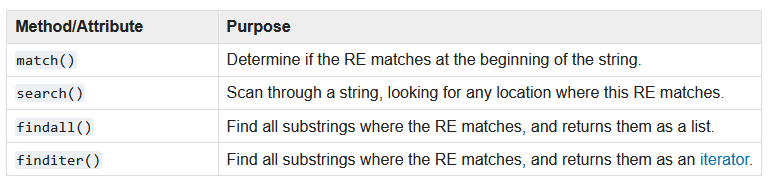

In [ ]:
test_str = "I love NLP!"

m = p.search(test_str)

print(m)

<re.Match object; span=(7, 10), match='NLP'>


In [ ]:
m = p.findall(test_str)

print(m)

['NLP']


In [ ]:
for m in p.finditer(test_str):
  print(m);

<re.Match object; span=(7, 10), match='NLP'>


In [ ]:
test_str = "I love NLP and NLP!"

for m in p.finditer(test_str):
  print(m);

<re.Match object; span=(7, 10), match='NLP'>
<re.Match object; span=(15, 18), match='NLP'>


> Match Object functions:

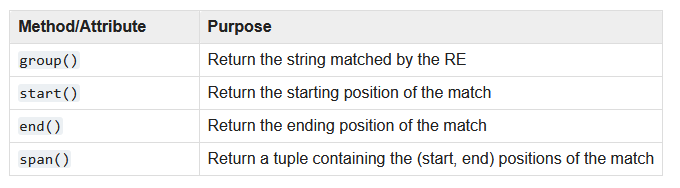

In [ ]:
for m in p.finditer(test_str):
  print( "Start pos: %d, End pos: %d, Matched String: %s" % (m.start(), m.end(), m.group() ));

Start pos: 7, End pos: 10, Matched String: NLP
Start pos: 15, End pos: 18, Matched String: NLP


In [ ]:
for m in p.finditer(test_str):
  mpos = m.span(); # Match positions tuple
  print( "Start pos: %d, End pos: %d, Matched String: %s" % (mpos[0], mpos[1], test_str[mpos[0]:mpos[1]] ) );

Start pos: 7, End pos: 10, Matched String: NLP
Start pos: 15, End pos: 18, Matched String: NLP


## Metacharacters in Search Patterns

Some of the metacharacters are:

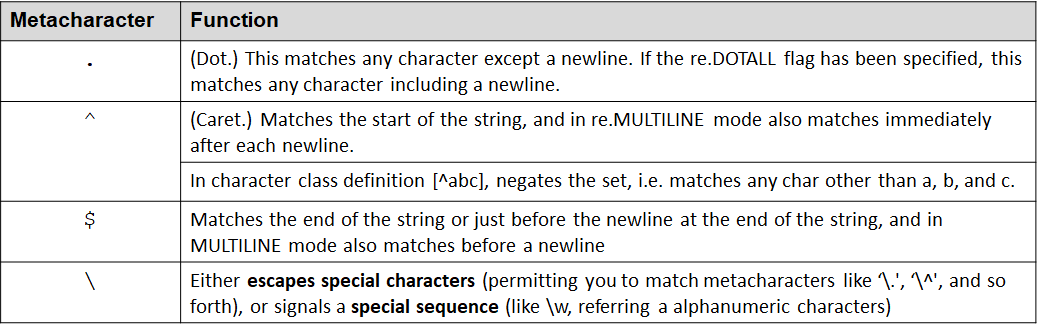

**Unprintable characters**

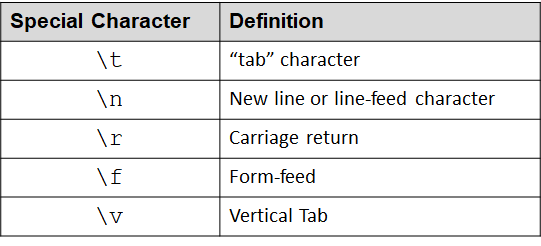

In [ ]:
test_str = "NLP is fun! I love NLP";

p = re.compile(r'.');

m = p.findall(test_str);
print(m)

['N', 'L', 'P', ' ', 'i', 's', ' ', 'f', 'u', 'n', '!', ' ', 'I', ' ', 'l', 'o', 'v', 'e', ' ', 'N', 'L', 'P']


In [ ]:
test_str = "NLP is fun! I love NLP";

p = re.compile(r'NLP');

m = p.match(test_str);
print("Match result:", m)

m = p.search(test_str);
print("Search result:", m)

m = p.findall(test_str);
print("Findall result:", m)

Match result: <re.Match object; span=(0, 3), match='NLP'>
Search result: <re.Match object; span=(0, 3), match='NLP'>
Findall result: ['NLP', 'NLP']


In [ ]:
p = re.compile(r'NLP$')

m = p.search(test_str);
print("Search result:", m)

m = p.findall(test_str);
print("Findall result:", m)

Search result: <re.Match object; span=(19, 22), match='NLP'>
Findall result: ['NLP']


In [ ]:
p = re.compile(r'^NLP')

m = p.search(test_str);
print("Search result:", m)

m = p.findall(test_str);
print("Findall result:", m)

Search result: <re.Match object; span=(0, 3), match='NLP'>
Findall result: ['NLP']


In [ ]:
test_str = "It costs 100$ to me";

p = re.compile(r'\$')

m = p.search(test_str);
print("Search result:", m)

m = p.findall(test_str);
print("Findall result:", m)

Search result: <re.Match object; span=(12, 13), match='$'>
Findall result: ['$']


In [ ]:
test_str = "Backslash is \.";

p = re.compile(r'\\')

m = p.search(test_str);
print("Search result:", m)
print("Search result as group result:", m.group())

Search result: <re.Match object; span=(13, 14), match='\\'>
Search result as group result: \


**Character Classes**



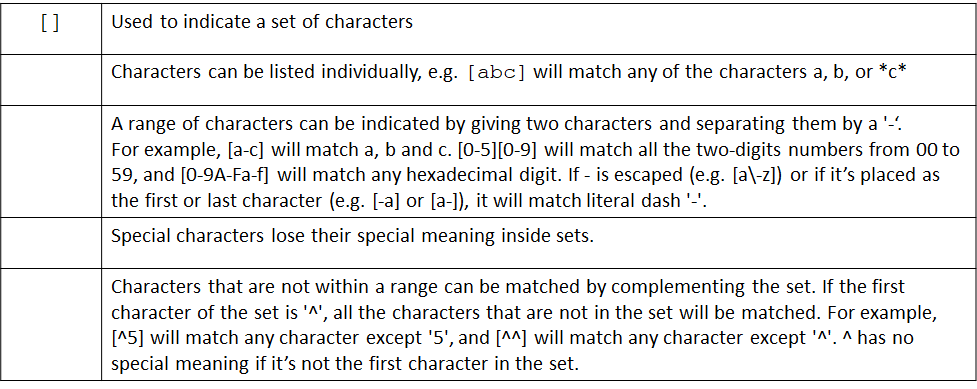

**Examples**

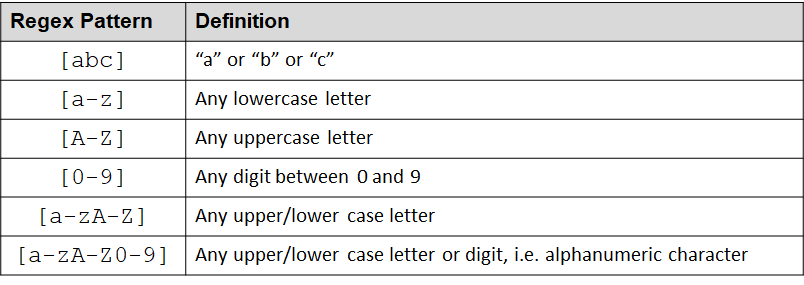

In [ ]:
test_str = "Elmalar dalındayken bugün elma toplamaya gittik."

pattern = r'Elma';

m = re.compile(pattern);

m.findall(test_str)

['Elma']

In [ ]:
pattern = r'[eE]lma'; # Match "lma" pattern starting either "e" or "E".

m = re.compile(pattern);

m.findall(test_str)

['Elma', 'elma']

In [ ]:
test_str = "abcdefg 123 99 abc123 x1y2z3"

pattern = r'[^0-9 a-c]| [9]';

m = re.compile(pattern);

print(m.findall(test_str))

['d', 'e', 'f', 'g', ' 9', 'x', 'y', 'z']


In [ ]:
pattern = r' [0-9][0-9] ';

m = re.compile(pattern);

print(m.findall(test_str))

[' 99 ']


In [ ]:
pattern = r'[a-z][0-9][0-9]';

m = re.compile(pattern);

print(m.findall(test_str))

['c12']


In [ ]:
pattern = r'[^a-z][0-9][0-9]';

m = re.compile(pattern);

print(test_str);
print(m.findall(test_str));

abcdefg 123 99 abc123 x1y2z3
[' 12', ' 99', '123']


**Important**

> Regex makes **non-overlapping matches**!!

Inspect the below example in [regex101](https://regex101.com/)

In [ ]:
# Note: regex101 example
test_str = "abcde abcdef"

pattern = r'[a-zA-Z][a-zA-Z]' # matches character pairs

m = re.compile(pattern);

m.findall(test_str)

['ab', 'cd', 'ab', 'cd', 'ef']

**Special Character Classes**

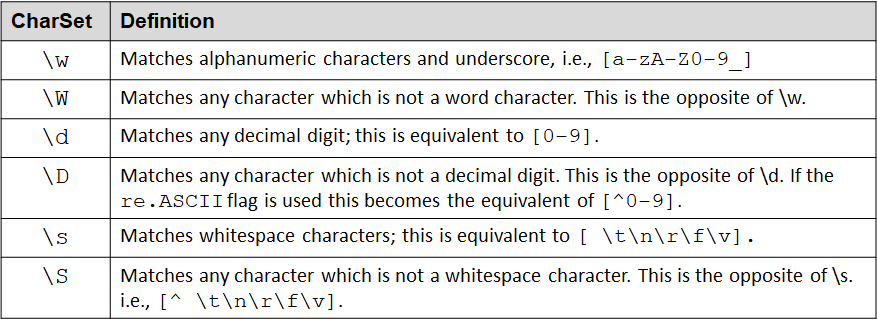

In [ ]:
# Note: regex101 example
test_str = "abcde abcdef"

pattern = r'\w\w' # matches character pairs

m = re.compile(pattern);

m.findall(test_str)

['ab', 'cd', 'ab', 'cd', 'ef']

In [ ]:
pattern = r'\s\w\w' # matches whitespace character followed by two alphanumeric

m = re.compile(pattern);

m.findall(test_str)

[' ab']

In [ ]:
test_str = "abcdefg 123 99 abc123 x1y2z3";

pattern = r'\d\d' # Matches 2 digit numbers

m = re.compile(pattern);

m.findall(test_str)

['12', '99', '12']

**Anchors**



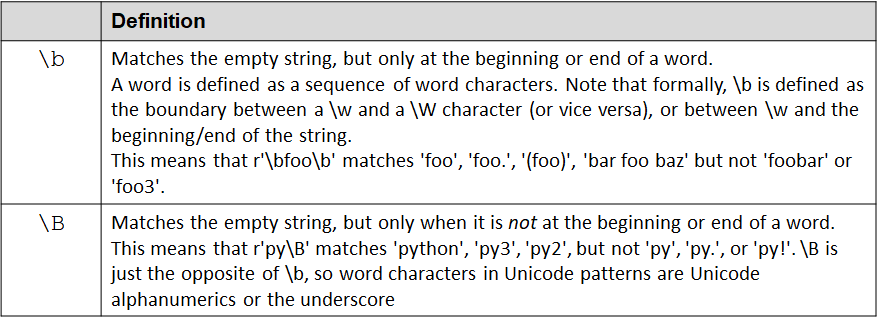

[regex101](https://regex101.com/)

In [ ]:
test_str = "foo foo. (foo) bar foo baz foobar"

pattern = r'\bfoo\b'

m = re.compile(pattern);

for match in m.finditer(test_str):
  mpos = match.span(); # Match positions tuple
  print( "Start pos: %d, End pos: %d, Matched String: %s" % (mpos[0], mpos[1], test_str[mpos[0]:mpos[1]] ) );

Start pos: 0, End pos: 3, Matched String: foo
Start pos: 4, End pos: 7, Matched String: foo
Start pos: 10, End pos: 13, Matched String: foo
Start pos: 19, End pos: 22, Matched String: foo


**Exercise**

Do the same validation for <code>\B</code>.

<code>r'py\B'</code> matches <code>'python', 'py3', 'py2'</code>, but not <code>'py', 'py.', </code> or <code>'py!'</code>

In [ ]:
test_str = "python py3 py2 py py. py!";

pattern = r'py\B'

m = re.compile(pattern);

for match in m.finditer(test_str):
  mpos = match.span(); # Match positions tuple
  print( "Start pos: %d, End pos: %d, Matched String: %s" % (mpos[0], mpos[1], test_str[mpos[0]:mpos[1]] ) );

Start pos: 0, End pos: 2, Matched String: py
Start pos: 7, End pos: 9, Matched String: py
Start pos: 11, End pos: 13, Matched String: py


**Quantifiers**

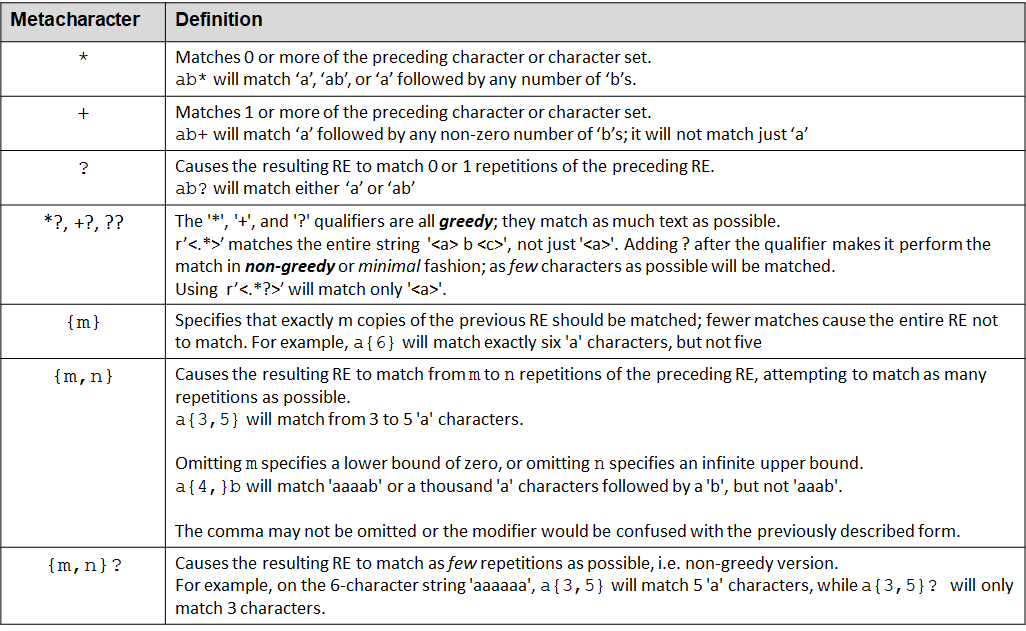

**Exercises**

> Exercise 1
  
  Write a search pattern that matches all of three sequences <code> "abc abcde abcdefg".

In [ ]:
test_str = "abc abcde abcdefg"

pattern = r'abc[defg]*';

m = re.compile(pattern);

m.findall(test_str)

['abc', 'abcde', 'abcdefg']

> Exercise 2
  
  Write a search pattern that matches all of the numbers in <code> "abc123xyz 123 var g = 123;".

In [ ]:
test_str = "abc123xyz 123 var g = 123;"

pattern = r'123';

m = re.compile(pattern);

m.findall(test_str)

> Exercise 3
  
  Write a search pattern using only metacharacters to

* Match: abc.
* Match: 123.
* Match: ?=+.
* Skip : abc1

In [ ]:
test_str = """
abc.
123.
?=+.
abc1
""";

pattern = r'...\.';

m = re.compile(pattern, re.MULTILINE);

m.findall(test_str)

['abc.', '123.', '?=+.']

> Exercise 4
  
  Write a search pattern to

* Match: can
* Match: man
* Match: fan
* Skip : dan
* Skip : ran
* Skip : pan

In [ ]:
test_str = """
can
man
fan
dan
ran
pan
"""

pattern = r'[cmf]an';

m = re.compile(pattern, re.MULTILINE);

m.findall(test_str)

['can', 'man', 'fan']

> Exercise 5
  
  Write a search pattern to

* Match: Ana
* Match: Bob
* Match: Cpc
* Skip : aax
* Skip : bby
* Skip : ccz

In [ ]:
test_str = """
Ana
Bob
Cpc
aax
bby
ccz
"""

pattern = r'[A-C][n-p][a-c]';

m = re.compile(pattern, re.MULTILINE);

m.findall(test_str)

> Exercise 6
  
  Write a search pattern to

* Match: wazzzzzup
* Match: wazzzup
* Skip : wazup


In [ ]:
test_str = """
wazzzzzup
wazzzup
wazup
""";

pattern = r'waz{3,5}up';

m = re.compile(pattern, re.MULTILINE);

m.findall(test_str)

['wazzzzzup', 'wazzzup']

> Exercise 7
  
  Write a search pattern to

* Match: aaaabcc
* Match: aabbbbc
* Match: aacc
* Skip : a

In [ ]:
test_str = """
aaaabcc
aabbbbc
aacc
a
""";

pattern = r'aa+b*c+';

m = re.compile(pattern, re.MULTILINE);

m.findall(test_str)

['aaaabcc', 'aabbbbc', 'aacc']

> Exercise 8
  
  Write a search pattern to

* Match: 1 file found?
* Match: 2 files found?
* Match: 24 files found?
* Skip : No files found.

In [ ]:
test_str = """
1 file found?
2 files found?
24 files found?
No files found.
""";

pattern = r'\d+ files? found\?';

m = re.compile(pattern, re.MULTILINE);

m.findall(test_str)

['1 file found?', '2 files found?', '24 files found?']

> Exercise 9
  
  Write a search pattern to

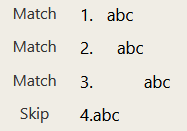

In [ ]:
test_str = """
1.  abc
2.    abc
3.       abc
4.abc
"""

pattern = r'\d\.\s+abc';

m = re.compile(pattern, re.MULTILINE);

m.findall(test_str)

['1.  abc', '2.    abc', '3.       abc']

> Exercise 10
  
  Write a search pattern to

* Match: Mission: successful
* Skip : Last Mission: unsuccessful
* Skip : Next Mission: successful upon capture of target


In [ ]:
test_str = """Mission: successful
Last Mission: unsuccessful
Next Mission: successful upon capture of target
"""
print(test_str);

pattern = r'^Mission: successful$';

m = re.compile(pattern, re.MULTILINE);

m.findall(test_str)

Mission: successful
Last Mission: unsuccessful
Next Mission: successful upon capture of target



['Mission: successful']

**Alternation and RE joins**

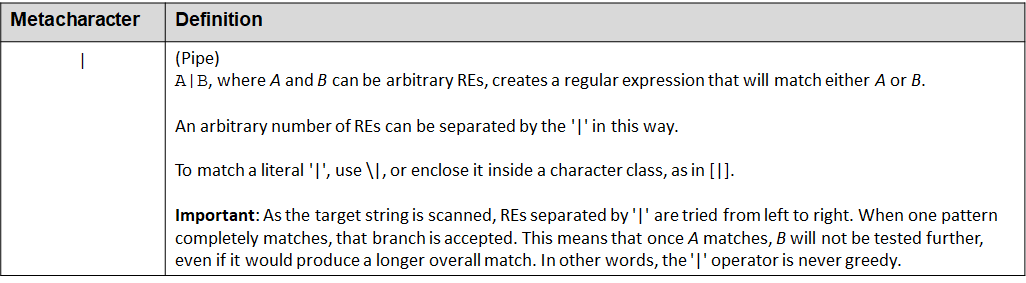

In [ ]:
test_str = "abc def 123"

pattern = "abc|def|123";

p = re.compile(pattern);

m = p.match(test_str);
print("Match result:", m)

m = p.search(test_str);
print("Search result:", m)

m = p.findall(test_str);
print("Findall result:", m)

Match result: <re.Match object; span=(0, 3), match='abc'>
Search result: <re.Match object; span=(0, 3), match='abc'>
Findall result: ['abc', 'def', '123']


In [ ]:
pattern = "def|abc|123";

p = re.compile(pattern);

m = p.match(test_str);
print("Match result:", m)

m = p.search(test_str);
print("Search result:", m)

m = p.findall(test_str);
print("Findall result:", m)

Match result: <re.Match object; span=(0, 3), match='abc'>
Search result: <re.Match object; span=(0, 3), match='abc'>
Findall result: ['abc', 'def', '123']


**Joining Multiple Patterns**

In [ ]:
pat1 = r'abc';
pat2 = r'def';
pat3 = r'123';

pattern = "|".join([pat1, pat2, pat3]);
print(pattern);

In [ ]:
p = re.compile(pattern);

m = p.findall(test_str);
print("Findall result:", m)

Findall result: ['abc', 'def', '123']


**Grouping and BackReferencing**


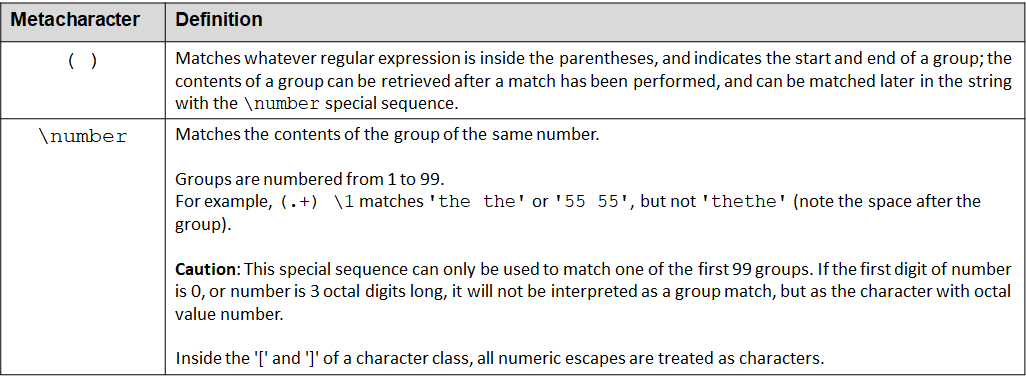

In [ ]:
test_str = "abc abc 123 123"

pattern = r'(abc) \1 (123) \2';

p = re.compile(pattern);

m = p.match(test_str);
print("Match result:", m)

m = p.search(test_str);
print("Search result:", m)

m = p.findall(test_str);
print("Findall result:", m)

re.sub(r"(abc)",r"\1de",test_str)

Match result: <re.Match object; span=(0, 15), match='abc abc 123 123'>
Search result: <re.Match object; span=(0, 15), match='abc abc 123 123'>
Findall result: [('abc', '123')]


'abcde abcde 123 123'

In [ ]:
test_str = "abc abc 123 123"

pattern = r'(abc) \1 (123) \2';

p = re.compile(pattern);

m = p.search(test_str);

print("Group no: 0, Group Span: %s, match: %s" % (m.span(0), m.group(0)));

for gnum in range(1, len(m.groups())+1):
  print("Group No: %d, group span: %s, match: %s" % ( gnum, m.span(gnum), m.group(gnum)));


Group no: 0, Group Span: (0, 15), match: abc abc 123 123
Group No: 1, group span: (0, 3), match: abc
Group No: 2, group span: (8, 11), match: 123


In [ ]:
test_str = """
May 2nd, 1998
Jun 3rd, 2002
"""

pattern = "((\w+) (\d\w{2}), (\d+))"

p = re.compile(pattern);

m = p.search(test_str);

print("Group no: 0, Group Span: %s, match: %s" % (m.span(0), m.group(0)));

for gnum in range(1, len(m.groups())+1):
  print("Group No: %d, group span: %s, match: %s" % ( gnum, m.span(gnum), m.group(gnum)));

Group no: 0, Group Span: (1, 14), match: May 2nd, 1998
Group No: 1, group span: (1, 14), match: May 2nd, 1998
Group No: 2, group span: (1, 4), match: May
Group No: 3, group span: (5, 8), match: 2nd
Group No: 4, group span: (10, 14), match: 1998


In [ ]:
m = p.findall(test_str);
m

[('May 2nd, 1998', 'May', '2nd', '1998'),
 ('Jun 3rd, 2002', 'Jun', '3rd', '2002')]

## Tokenizer



In [ ]:
pattern = r'';